# Face detection using Cognitive Services
This walkthrough shows you how to use the cognitive services [Face API](https://azure.microsoft.com/services/cognitive-services/face/) to detect faces in an image. The API also returns various attributes such as the gender and age of each person. The sample images used in this walkthrough are from the [How-Old Robot](http://www.how-old.net) that uses the same APIs.

You can run this example as a Jupyter notebook on [MyBinder](https://mybinder.org) by clicking on the launch Binder badge: 

[![Binder](https://mybinder.org/badge.svg)](https://mybinder.org/v2/gh/Microsoft/cognitive-services-notebooks/master?filepath=FaceAPI.ipynb)

For more information, see the [REST API Reference](https://westus.dev.cognitive.microsoft.com/docs/services/563879b61984550e40cbbe8d/operations/563879b61984550f30395236).

## Prerequisites
You must have a [Cognitive Services API account](https://docs.microsoft.com/azure/cognitive-services/cognitive-services-apis-create-account) with **Face API**. The [free trial](https://azure.microsoft.com/try/cognitive-services/?api=face-api) is sufficient for this quickstart. You need the subscription key provided when you activate your free trial, or you may use a paid subscription key from your Azure dashboard.

## Running the walkthrough
To continue with this walkthrough, replace `subscription_key` with a valid subscription key.

In [43]:
from keys import api_key
subscription_key = api_key()
assert subscription_key

Next, verify `face_api_url` and make sure it corresponds to the region you used when generating the subscription key. If you are using a trial key, you don't need to make any changes.

In [44]:
face_api_url = 'https://centralus.api.cognitive.microsoft.com/face/v1.0/detect'

Here is the URL of the image. You can experiment with different images  by changing ``image_url`` to point to a different image and rerunning this notebook.

In [45]:
image_url = 'https://how-old.net/Images/faces2/main007.jpg'

The next few lines of code call into the Face API to detect the faces in the image. In this instance, the image is specified via a publically visible URL. You can also pass an image directly as part of the request body. For more information, see the [API reference](https://westus.dev.cognitive.microsoft.com/docs/services/563879b61984550e40cbbe8d/operations/563879b61984550f30395236). 

In [46]:
import requests
from IPython.display import HTML

headers = { 'Ocp-Apim-Subscription-Key': subscription_key }
    
params = {
    'returnFaceId': 'true',
    'returnFaceLandmarks': 'false',
    'returnFaceAttributes': 'age,gender,headPose,smile,facialHair,glasses,emotion,hair,makeup,occlusion,accessories,blur,exposure,noise',
}

response = requests.post(face_api_url, params=params, headers=headers, json={"url": image_url})
faces = response.json()
HTML("<font size=5>Detected <font color='blue'>%d</font> faces in the image</font>"%len(faces))

Finally, the face information can be overlaid of the original image using the `matplotlib` library in Python.

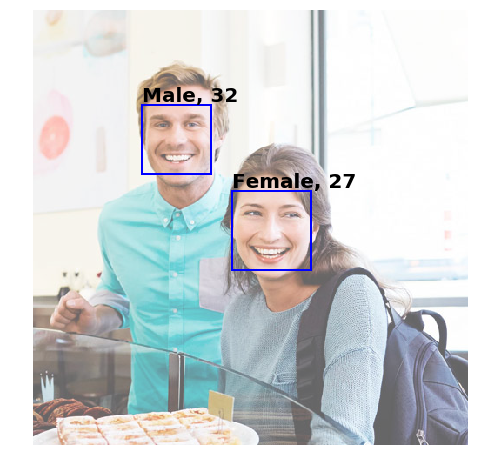

In [47]:
%matplotlib inline
import matplotlib.pyplot as plt

from PIL import Image
from matplotlib import patches
from io import BytesIO

response = requests.get(image_url)
image = Image.open(BytesIO(response.content))

plt.figure(figsize=(8,8))
ax = plt.imshow(image, alpha=0.6)
for face in faces:
    fr = face["faceRectangle"]
    fa = face["faceAttributes"]
    origin = (fr["left"], fr["top"])
    p = patches.Rectangle(origin, fr["width"], fr["height"], fill=False, linewidth=2, color='b')
    ax.axes.add_patch(p)
    plt.text(origin[0], origin[1], "%s, %d"%(fa["gender"].capitalize(), fa["age"]), fontsize=20, weight="bold", va="bottom")
_ = plt.axis("off")

Here are more images that can be analyzed using the same technique.
First, define a helper function, ``annotate_image`` to annotate an image given its URL by calling into the Face API.

In [48]:
def annotate_image(image_url):
    response = requests.post(face_api_url, params=params, headers=headers, json={"url": image_url})
    faces = response.json()

    image_file = BytesIO(requests.get(image_url).content)
    image = Image.open(image_file)

    plt.figure(figsize=(8,8))
    ax = plt.imshow(image, alpha=0.6)
    for face in faces:
        print(face["faceAttributes"]["headPose"]) # print attributes
        fr = face["faceRectangle"]
        fa = face["faceAttributes"]
        origin = (fr["left"], fr["top"])
        p = patches.Rectangle(origin, fr["width"], \
                              fr["height"], fill=False, linewidth=2, color='b')
        ax.axes.add_patch(p)
        plt.text(origin[0], origin[1], "%s, %d"%(fa["gender"].capitalize(), fa["age"]), \
                 fontsize=20, weight="bold", va="bottom")
    plt.axis("off")

You can then call ``annotate_image`` on other images. A few examples samples are shown below.

{'pitch': 0.0, 'roll': 2.8, 'yaw': -25.1}


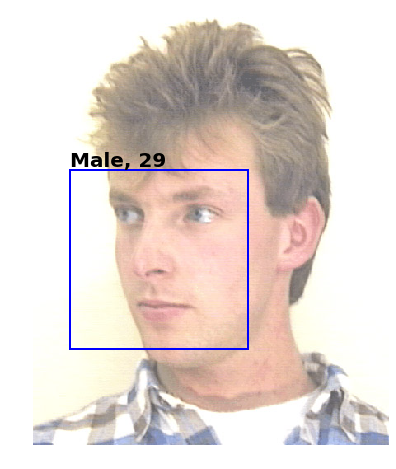

In [49]:
annotate_image("https://storage.googleapis.com/poster-ai-bucket/aberdeen-faces-dataset/andrew!45.jpg")

{'pitch': 0.0, 'roll': -0.2, 'yaw': -0.8}


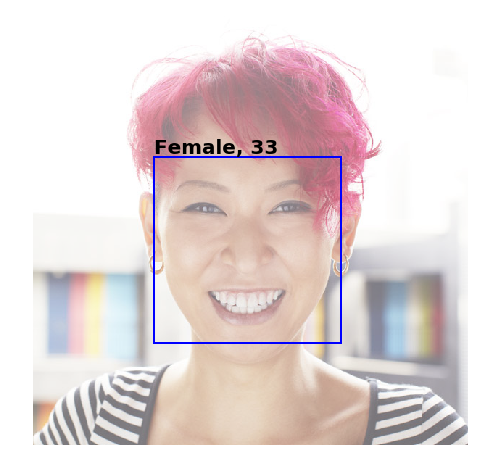

In [50]:
annotate_image("https://how-old.net/Images/faces2/main002.jpg")

{'pitch': 0.0, 'roll': -9.0, 'yaw': 22.7}
{'pitch': 0.0, 'roll': -5.2, 'yaw': 8.5}


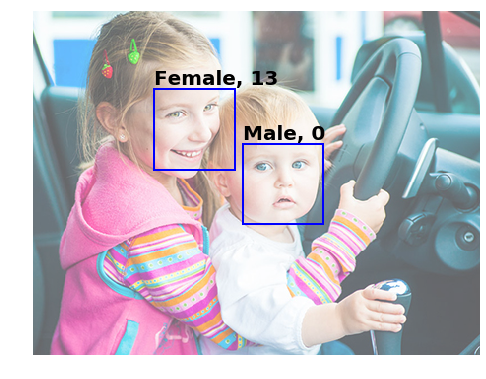

In [51]:
annotate_image("https://how-old.net/Images/faces2/main004.jpg")